#  
# 
## <span style="color: tomato;">WHO WILL BE THE NEXT OLYMPIC MEDALIST?</span>
by Mika Yosef
#
### this notebook try to analyze what are the characters of an athlete that can improve his\ her chances to win an olympic medal. 

### This analysis based on a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

<img src="https://www.geosuper.tv/assets/uploads/updates/2019-07-24/1752_6249951_updates.jpg"></img>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv(r"C:\Users\mikay\Desktop\MBA\data science\project\olympics.csv")

raw_df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### clean and sort the data

1. Cropped data:
 a. Empty observations.
 b. Winter Olympic related data.
 c. The columns: "id", "name", "team", "games", "season".
 d. Irrelevant events that don't appears in the Olympics since 2016
2. Change some columns type from string to numeric value.
3. Marge differences NOC for the same countries.
4. Change the data type.
#
The data will be without null and irrelevant games. all the observations will focus in summer games and the features that can be relevant for the target.


In [3]:
raw_df[['year','seas']] = raw_df.games.str.split(expand=True)
part_df=raw_df
part_df["medal"] = part_df["medal"].replace(np.nan, "None", regex=True)

part_df["season"] = part_df["season"].replace("Winter", np.nan , regex=True) 
part_df = part_df.dropna()
part_df = part_df.drop(columns=["id","name","team","seas","games","season"])
part_df["year"] = pd.to_numeric(part_df.year, errors='coerce')

# marge contries to one team
part_df = part_df.rename(columns={"noc": "team"})
part_df["team"] = part_df["team"].replace("AHO", "NED", regex=True)
part_df["team"] = part_df["team"].replace("ANZ", "AUS", regex=True)
part_df["team"] = part_df["team"].replace("BOH", "CZE", regex=True)
part_df["team"] = part_df["team"].replace("CRT", "GRE", regex=True)
part_df["team"] = part_df["team"].replace(["NBO","MAL"], "MAS", regex=True)
part_df["team"] = part_df["team"].replace("NFL", "CAN", regex=True)
part_df["team"] = part_df["team"].replace(["YMD","YAR"], "YEM", regex=True)
part_df["team"] = part_df["team"].replace("YUG", "SRB", regex=True)
part_df["team"] = part_df["team"].replace(["URS", "EUN"], "RUS", regex=True)
part_df["team"] = part_df["team"].replace(["GDR", "FRG"], "GER", regex=True)



part_df["sex"] = part_df["sex"].replace("F", 1 , regex=True) 
part_df["sex"] = part_df["sex"].replace("M", 0 , regex=True)
part_df["medal num"] = part_df["medal"].replace(["None","Bronze", "Silver", "Gold"], [0, 1, 2, 3], regex=True)
part_df["medal bin"] = part_df["medal"].replace(["None","Bronze", "Silver", "Gold"], [0, 1, 1, 1], regex=True)

# data type
part_df["age"] = part_df["age"].astype('uint8')
part_df["height"] = part_df["height"].astype('uint8')
part_df["weight"] = part_df["weight"].astype('float32')
part_df["year"] = part_df["year"].astype('uint16')
part_df["sex"] = part_df["sex"].astype('uint8')




In [4]:
events_to_drop = []
for event in part_df['event'].unique():
    df_event = part_df[part_df["event"] == event]
    df_event = df_event["year"].unique()
    df_event = np.sort(df_event)
    if df_event[-1]<2016:
        events_to_drop.append(event)

df = part_df.copy()
for e in events_to_drop:
    df = df.drop(df[df.event == e].index)

df.head()


,sex,age,height,weight,team,year,city,sport,event,medal,medal num,medal bin
0,0,24,180,80.0,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,None,0,0
1,0,23,170,60.0,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,None,0,0
31,0,31,172,70.0,FIN,2000,Sydney,Badminton,Badminton Men's Singles,None,0,0
32,1,30,159,55.5,FIN,1996,Atlanta,Sailing,Sailing Women's Windsurfer,None,0,0
33,1,34,159,55.5,FIN,2000,Sydney,Sailing,Sailing Women's Windsurfer,None,0,0


# 
# <span style="color: skyblue;">Visualiztion</span>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149315 entries, 0 to 271110
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sex        149315 non-null  uint8  
 1   age        149315 non-null  uint8  
 2   height     149315 non-null  uint8  
 3   weight     149315 non-null  float32
 4   team       149315 non-null  object 
 5   year       149315 non-null  uint16 
 6   city       149315 non-null  object 
 7   sport      149315 non-null  object 
 8   event      149315 non-null  object 
 9   medal      149315 non-null  object 
 10  medal num  149315 non-null  int64  
 11  medal bin  149315 non-null  int64  
dtypes: float32(1), int64(2), object(5), uint16(1), uint8(3)
memory usage: 10.4+ MB


In [6]:
df.describe()

,sex,age,height,weight,year,medal num,medal bin
count,149315.000000,149315.000000,149315.000000,149315.000000,149315.000000,149315.000000,149315.000000
mean,0.339892,24.818833,175.543087,70.414162,1989.791327,0.294579,0.147393
std,0.473674,5.509316,11.106019,14.917234,20.477514,0.775563,0.354499
min,0.000000,11.000000,127.000000,25.000000,1896.000000,0.000000,0.000000
25%,0.000000,21.000000,168.000000,60.000000,1976.000000,0.000000,0.000000
50%,0.000000,24.000000,175.000000,69.000000,1992.000000,0.000000,0.000000
75%,1.000000,28.000000,183.000000,79.000000,2008.000000,0.000000,0.000000
max,1.000000,71.000000,226.000000,214.000000,2016.000000,3.000000,1.000000


In [7]:
df["medal"].value_counts()

None      127307
Bronze      7446
Gold        7415
Silver      7147
Name: medal, dtype: int64

In [36]:
df_figg

,Distribution
No medal,127307
bronze,7446
gold,7415
silver,7147


array([<AxesSubplot:ylabel='Distribution'>], dtype=object)

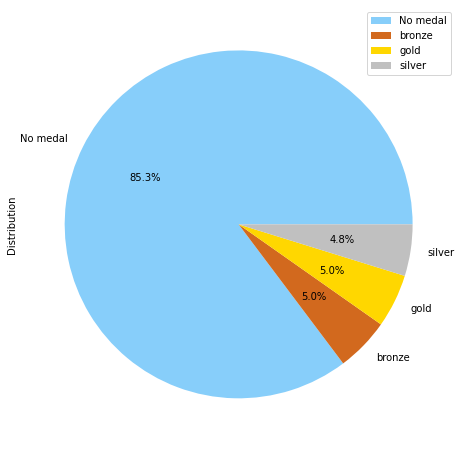

In [37]:
df_figg = pd.DataFrame({"Distribution": [127307, 7446, 7415, 7147]}, index=['No medal', 'bronze', 'gold', 'silver'])
df_figg.plot.pie(figsize=(8, 8), colors=['lightskyblue','chocolate','gold','silver'], subplots=True, autopct='%1.1f%%')


I used the TSNE algorithm to check if it is possible to see any classes. The result that came out showed that classes can indeed be identified by different characteristics (age, year of competition), but when I examined the target value - winning a medal, it seems that it is a random distribution and there are not necessarily characteristics that distinguish the class of medal winners from the others. It is a complex problem.


In [24]:
from sklearn.decomposition import PCA
df_tsne = pd.get_dummies(df)
df_tsne_np = df_tsne.to_numpy()

pca = PCA(n_components=50)
medal_train_vectors = df_tsne_np.reshape(df_tsne_np.shape[0], -1)
pca_vectors = pca.fit_transform( medal_train_vectors )
print(f"PCA: reduced dimentions from {medal_train_vectors.shape} to {pca_vectors.shape}")

PCA: reduced dimentions from (149315, 589) to (149315, 50)


In [25]:
from openTSNE import TSNE
tsne  = TSNE(n_components=2, random_state=48, 
             exaggeration=1, n_jobs=4)
tsne_vectors = tsne.fit(pca_vectors) 

C:\Users\mikay\AppData\Local\Temp/ipykernel_59944/2341313162.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show("png")


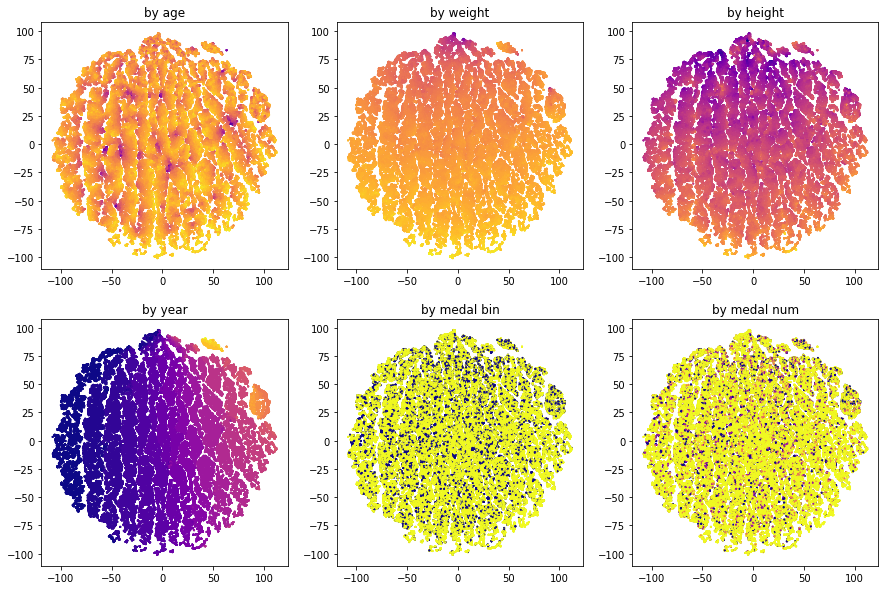

In [26]:

x = tsne_vectors[:,0]
y = tsne_vectors[:,1]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
vars = ["age", "weight", "height","year", "medal bin","medal num"]
df["year"]=np.array(df["year"])

for i,v in enumerate(vars):
    axes[i//3,i%3].scatter(x, y, c=df[v], s=1, cmap='plasma_r')
    axes[i//3,i%3].set_title("by {}".format(v))

fig.savefig('fig.png')
fig.show("png")

In [9]:
df_group = df.groupby(["team"]).sum().sort_values('medal bin', ascending = False)
df_bestgroup = df_group[:10]
df_bestgroup

,sex,age,height,weight,year,medal num,medal bin
team,,,,,,,
USA,3561.0,244062.0,1736047.0,710064.0,19382482.0,8002,3457
RUS,2711.0,174477.0,1244793.0,505782.0,14033500.0,5292,2591
GER,3302.0,225868.0,1613883.0,653354.5,18060292.0,4507,2286
AUS,2235.0,140595.0,999381.0,406527.0,11248704.0,1972,1040
GBR,2375.0,156932.0,1090580.0,435562.0,12333784.0,1705,871
CHN,2112.0,89276.0,673756.0,259781.5,7792688.0,1721,830
FRA,1728.0,141778.0,983163.0,388969.5,11124904.0,1388,714
ITA,1452.0,123836.0,870088.0,349905.0,9819296.0,1301,682
JPN,1855.0,119758.0,833935.0,311330.0,9846084.0,1198,633


The ten countries with the largest number of medals are: 
1.	United States
2.	Russia
3.	Germany
4.	Australia
5.	United Kingdom
6.	China
7.	France
8.	Italy
9.	Japan
10.	Hungary

In [10]:
df_groups = df.groupby(["team", "medal num"]).sum().sort_values('medal bin', ascending = False)
df_bestgroups = df_groups[:10]
df_bestgroups

,,sex,age,height,weight,year,medal bin
team,medal num,,,,,,
USA,3,684.0,43054.0,330419.0,137994.5,3600910.0,1818
RUS,3,403.0,23822.0,170588.0,71391.0,1911544.0,963
USA,2,362.0,22057.0,162922.0,67397.0,1802068.0,909
RUS,1,291.0,21393.0,152928.0,64455.0,1694476.0,853
GER,1,309.0,20225.0,145744.0,60043.0,1620434.0,816
RUS,2,281.0,19196.0,137964.0,57628.5,1537764.0,775
GER,3,299.0,19333.0,135280.0,56710.0,1492608.0,751
USA,1,304.0,18273.0,130680.0,54132.5,1449246.0,730
GER,2,294.0,17713.0,128392.0,52790.0,1426068.0,719


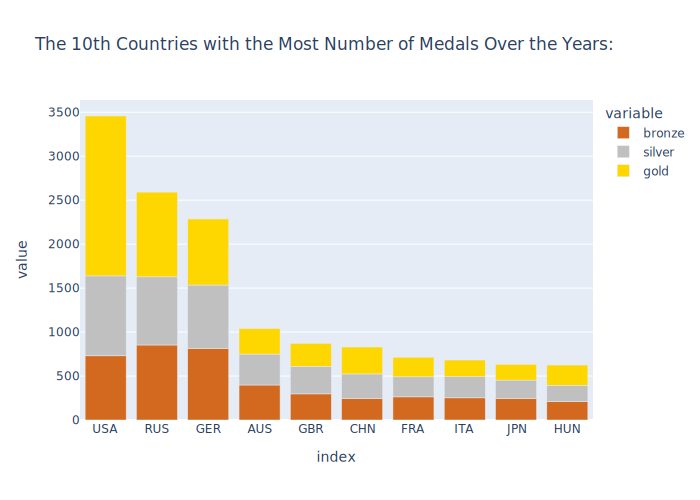

In [12]:
pd.options.plotting.backend = "plotly"
import plotly.express as px


best = ['USA', 'RUS','GER','AUS','GBR','CHN','FRA','ITA','JPN','HUN']
bronze = []
silver = []
gold = []

for b in best:
    for i in range(1,4):
        relevant = df_groups[df_groups.index == (b, i)]
        medal_res = relevant['medal bin'].values[0]
        if i==1:
            bronze.append(medal_res)
        if i==2:
            silver.append(medal_res)
        if i==3:
            gold.append(medal_res)


df_dict = pd.DataFrame({'bronze':bronze, 'silver':silver, 'gold':gold}, index=best)
fig2 = px.bar(df_dict, color_discrete_sequence=["chocolate", "silver", "gold"], title="The 10th Countries with the Most Number of Medals Over the Years:")
fig2.write_image("fig2.png")
fig2.show("png")
  

In the graph above, you can see the top ten countries in the number of medals they have won over the years, according to the distribution of the types of medals.

In [12]:
pd.options.plotting.backend = "matplotlib"


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_data = df.drop(columns = ["medal","medal num", "medal bin"])
train_data = pd.get_dummies(train_data)
y_num = df["medal num"]
y_bin = df["medal bin"]

#numeric split:
x_train, x_test, y_train, y_test = train_test_split(train_data, y_num, test_size=0.20, random_state=16)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=16) 

#binar
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(train_data, y_bin, test_size=0.20, random_state=16)
x_test_bin, x_val_bin, y_test_bin, y_val_bin = train_test_split(x_test_bin, y_test_bin, test_size=0.5, random_state=16) 

# <span style="color: skyblue;">Decision Tree</span>

In [41]:
from sklearn.tree import DecisionTreeClassifier

depths = np.array(range(1,45))
train_set_accuracy = np.zeros ( depths.shape ) 

val_set_accuracy = np.zeros ( depths.shape )
number_of_leaves = np.zeros ( depths.shape )

for i, current_depth in enumerate(depths):
    decision_tree =  DecisionTreeClassifier(max_depth=current_depth)
    decision_tree.fit(x_train,y_train)

 
    train_set_accuracy[i]  = decision_tree.score(x_train,y_train)
    val_set_accuracy[i]  = decision_tree.score(x_val,y_val) 
    number_of_leaves[i] = decision_tree.tree_.node_count

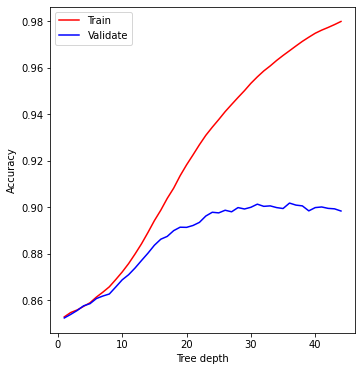

In [42]:
import matplotlib.pyplot as plt
plt.figure( figsize=(12,6))

plt.subplot(121)
plt.plot(depths,train_set_accuracy,'r',label = 'Train')
plt.plot(depths,val_set_accuracy,'b',label = 'Validate')
plt.xlabel('Tree depth'); plt.ylabel('Accuracy');
plt.legend()

plt.savefig("tree_depth_1.png")
plt.show()

by this graph, we can see that limiting the tree for depth of 40~ will be a good compromise to avoid overfit on the decision tree model. With deeper trees, the validation doesn't have a great improvement, so 40 will be the compromise between overfit and the precision on the validation data.



#
## the model:


In [22]:
from sklearn import tree

X = x_train
Y = y_train
tree_model = tree.DecisionTreeClassifier(max_depth=40, criterion='gini')
tree_model = tree_model.fit(X, Y)

In [23]:
y_pred_tree_train = tree_model.predict(x_train)
y_pred_tree_val = tree_model.predict(x_val)

In [24]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train,y_pred_tree_train)
acc_val = accuracy_score(y_val,y_pred_tree_val)
print(f"Decision Tree:\naccuracy score for train data: {acc_train :.2f} \naccuracy score for validation data: {acc_val :.2f}")

Decision Tree:
accuracy score for train data: 0.97 
accuracy score for validation data: 0.90


In [25]:

from sklearn.metrics import classification_report
target_names= ['None', 'Bronze', 'Silver', 'Gold']
creport = classification_report(y_val, y_pred_tree_val, target_names=target_names)
print("\tDecision Tree : classification report")
print(creport)


	Decision Tree : classification report
              precision    recall  f1-score   support

        None       0.94      0.96      0.95     12728
      Bronze       0.58      0.49      0.53       709
      Silver       0.63      0.52      0.57       726
        Gold       0.69      0.60      0.65       769

    accuracy                           0.90     14932
   macro avg       0.71      0.64      0.67     14932
weighted avg       0.89      0.90      0.90     14932




by this model, it seems that the results are very interesting: there is a 69% that the prediction of having a gold medal is right, and 60% of the gold medalists are recognized. I tried to check the prediction also on a binary model (win any medal, or not).
#
## binary decision tree model:

I will perform a similar process for the binary model, in order to check the optimal depth of the tree to prevent over-fit


In [43]:
depths = np.array(range(1,45))
train_set_accuracy = np.zeros ( depths.shape )
val_set_accuracy = np.zeros ( depths.shape )
number_of_leaves = np.zeros ( depths.shape )

for i, current_depth in enumerate(depths):
    decision_tree =  DecisionTreeClassifier(max_depth=current_depth)
    decision_tree.fit(x_train_bin,y_train_bin)

 
    train_set_accuracy[i]  = decision_tree.score(x_train_bin,y_train_bin)
    val_set_accuracy[i]  = decision_tree.score(x_val_bin,y_val_bin) 
    number_of_leaves[i] = decision_tree.tree_.node_count

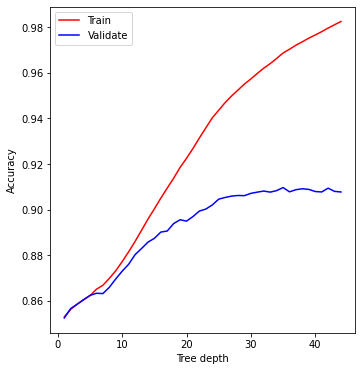

In [44]:
plt.figure( figsize=(12,6))

plt.subplot(121)
plt.plot(depths,train_set_accuracy,'r',label = 'Train')
plt.plot(depths,val_set_accuracy,'b',label = 'Validate')
plt.xlabel('Tree depth'); plt.ylabel('Accuracy');
plt.legend()
plt.savefig("tree_depth_2.png")
plt.show()

In contrast to the previous model, the binary model should be limited to a depth of 35, because above this depth there is no significant improvement in the prediction results.

In [28]:
X = x_train_bin
Y = y_train_bin
tree_bin = tree.DecisionTreeClassifier(max_depth=35, criterion='gini')
tree_bin = tree_bin.fit(X, Y)

In [29]:
y_pred_tree_train_bin = tree_bin.predict(x_train)
y_pred_tree_val_bin = tree_bin.predict(x_val)

In [30]:
acc_train_tree_bin = accuracy_score(y_train_bin,y_pred_tree_train_bin)
acc_val_tree_bin = accuracy_score(y_val_bin,y_pred_tree_val_bin)

print(f"Decision Tree - binary:\naccuracy score for train data: {acc_train_tree_bin :.2f}\naccuracy score for validation data: {acc_val_tree_bin :.2f}")

Decision Tree - binary:
accuracy score for train data: 0.97
accuracy score for validation data: 0.91


In [31]:
target_names= ['non-medalist', 'medalist']

creport_bin = classification_report(y_val_bin, y_pred_tree_val_bin, target_names=target_names)
print("\tDecision Tree-binar model : classification report")
print(creport_bin)

	Decision Tree-binar model : classification report
              precision    recall  f1-score   support

non-medalist       0.93      0.97      0.95     12728
    medalist       0.75      0.59      0.66      2204

    accuracy                           0.91     14932
   macro avg       0.84      0.78      0.80     14932
weighted avg       0.90      0.91      0.90     14932




this model present better results - from all the prediction of a medalist, 75% are correct. from all the prediction of beeing non-medalist, 93% are correct.
the model catch right 58% from the medalists, and 97% from the non-medalists.


________________


Now, I'm interested in testing whether the Random Forest model will be more successful.
#
I'll perform a test for binary variable and multi-classes variable:

# <span style="color: skyblue;">Random Forest</span>

In [49]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators =100, max_depth=30)
forest_model = random_forest.fit(x_train,y_train)


In [50]:
y_pred_rforest_train = forest_model.predict(x_train)
y_pred_rforest_val = forest_model.predict(x_val)

In [51]:
acc_rf_train = accuracy_score(y_train,y_pred_rforest_train)
acc_rf_val = accuracy_score(y_val,y_pred_rforest_val)
print(f"Random Forest:\naccuracy score for train data: {acc_rf_train :.2f} \naccuracy score for validation data: {acc_rf_val :.2f}")

Random Forest:
accuracy score for train data: 0.90 
accuracy score for validation data: 0.88


In [52]:
target_names= ['None', 'Bronze', 'Silver', 'Gold']
rep_random = classification_report(y_val, y_pred_rforest_val,target_names=target_names )
print("\tRandom Forest : classification report")
print(rep_random)

	Random Forest : classification report
              precision    recall  f1-score   support

        None       0.88      1.00      0.93     12728
      Bronze       1.00      0.16      0.27       709
      Silver       1.00      0.12      0.22       726
        Gold       0.99      0.26      0.41       769

    accuracy                           0.88     14932
   macro avg       0.97      0.38      0.46     14932
weighted avg       0.89      0.88      0.84     14932



The random forest model succeed to present better results than the dacision tree succeed.
The precision for each medal stand on 1, as well as the recall for non-medalist. The model is difficult to classify the medalists, but when it identifies observation as a potential to win a medal, the level of confidence in prediction is high.
#
now, I try to check if on a binar model the results will improve:


In [36]:
random_forest_bin = RandomForestClassifier(n_estimators =150,  max_depth=30, max_features= 30)
forest_model_bin = random_forest_bin.fit(x_train_bin,y_train_bin)

In [37]:
y_pred_rforest_train_bin = forest_model_bin.predict(x_train_bin)
y_pred_rforest_val_bin = forest_model_bin.predict(x_val_bin)

In [38]:
acc_rf_train_bin = accuracy_score(y_train_bin,y_pred_rforest_train_bin)
acc_rf_val_bin = accuracy_score(y_val_bin,y_pred_rforest_val_bin)
print(f"Random Forest - binary:\naccuracy score for train data: {acc_rf_train_bin :.2f} \naccuracy score for validation data: {acc_rf_val_bin :.2f}")

Random Forest - binary:
accuracy score for train data: 0.91 
accuracy score for validation data: 0.89


In [39]:
rep_random_bin = classification_report(y_val_bin, y_pred_rforest_val_bin, target_names=["non-medalist", 'medalist'] )
print("\tRandom Forest- binary : classification report")
print(rep_random_bin)

	Random Forest- binary : classification report
              precision    recall  f1-score   support

non-medalist       0.89      1.00      0.94     12728
    medalist       0.97      0.28      0.44      2204

    accuracy                           0.89     14932
   macro avg       0.93      0.64      0.69     14932
weighted avg       0.90      0.89      0.87     14932



The binary random forest model bring better results-
97% from the prediction of being a medalist, and 89% from the prediction of non-medalist were categorize correctly, where 100% of the non-medalist and 28% from the medalist were recognize correctly. 

now, I'll check if the models bring the same success with the test data, or they are overfited:

# <span style="color: skyblue;">Comparison Between Models</span>

In [40]:
# decision tree
y_pred_tree_test = tree_model.predict(x_test)
target_names= ['None', 'Bronze', 'Silver', 'Gold']
creport_test = classification_report(y_test, y_pred_tree_test, target_names=target_names)
print("\tDecision Tree - test : classification report")
print(creport_test)


# decision tree- binary
y_pred_tree_test_bin = tree_bin.predict(x_test)
creport_bin = classification_report(y_test_bin, y_pred_tree_test_bin, target_names=['non-medalist', 'medalist'])
print("\tDecision Tree - binary test : classification report")
print(creport_bin)


	Decision Tree - test : classification report
              precision    recall  f1-score   support

        None       0.94      0.96      0.95     12702
      Bronze       0.65      0.53      0.58       734
      Silver       0.70      0.54      0.61       744
        Gold       0.66      0.62      0.64       751

    accuracy                           0.90     14931
   macro avg       0.74      0.66      0.70     14931
weighted avg       0.90      0.90      0.90     14931

	Decision Tree - binary test : classification report
              precision    recall  f1-score   support

non-medalist       0.93      0.97      0.95     12702
    medalist       0.77      0.61      0.68      2229

    accuracy                           0.91     14931
   macro avg       0.85      0.79      0.82     14931
weighted avg       0.91      0.91      0.91     14931



In [41]:
# random forest:
y_pred_rforest_test = forest_model.predict(x_test)
target_names= ['None', 'Bronze', 'Silver', 'Gold']
rep_random_test = classification_report(y_test, y_pred_rforest_test,target_names=target_names )
print("\tRandom Forest - test : classification report")
print(rep_random_test)

#binar random forest:
y_pred_rforest_test_bin = forest_model_bin.predict(x_test)
rep_random_bin_test = classification_report(y_test_bin, y_pred_rforest_test_bin, target_names=["non-medalist", 'medalist'] )
print("\tRandom Forest- binary : classification report")
print(rep_random_bin_test)

	Random Forest - test : classification report
              precision    recall  f1-score   support

        None       0.88      1.00      0.94     12702
      Bronze       0.99      0.18      0.31       734
      Silver       1.00      0.19      0.31       744
        Gold       0.96      0.36      0.53       751

    accuracy                           0.89     14931
   macro avg       0.96      0.43      0.52     14931
weighted avg       0.90      0.89      0.86     14931

	Random Forest- binary : classification report
              precision    recall  f1-score   support

non-medalist       0.89      1.00      0.94     12702
    medalist       0.97      0.31      0.47      2229

    accuracy                           0.90     14931
   macro avg       0.93      0.65      0.71     14931
weighted avg       0.90      0.90      0.87     14931



In [42]:
acc_tree_test = accuracy_score(y_test,y_pred_tree_test)
acc_tree_test_bin = accuracy_score(y_test_bin,y_pred_tree_test_bin)
acc_rf_test = accuracy_score(y_test,y_pred_rforest_test)
acc_rf_test_bin = accuracy_score(y_test_bin,y_pred_rforest_test_bin)

In [43]:
wanted_cols = ['model', 'dataset type', 'accuracy']
rows = []

In [44]:
rows.append(['decision tree', 'train', acc_train])
rows.append(['decision tree', 'val', acc_val])
rows.append(['decision tree', 'test', acc_tree_test])

rows.append(['binar decision tree', 'train', acc_train_tree_bin])
rows.append(['binar decision tree', 'val', acc_val_tree_bin])
rows.append(['binar decision tree', 'test', acc_tree_test_bin])

rows.append(['random forest', 'train', acc_rf_train])
rows.append(['random forest', 'val', acc_rf_val])
rows.append(['random forest', 'test', acc_rf_test])

rows.append(['binar random forest', 'train', acc_rf_train])
rows.append(['binar random forest', 'val', acc_rf_val])
rows.append(['binar random forest', 'test', acc_rf_test_bin])

data_res = pd.DataFrame(rows, columns=wanted_cols)
rounded_data_res = data_res.round(decimals=2)



Text(0.98, -0.18, '0.97')

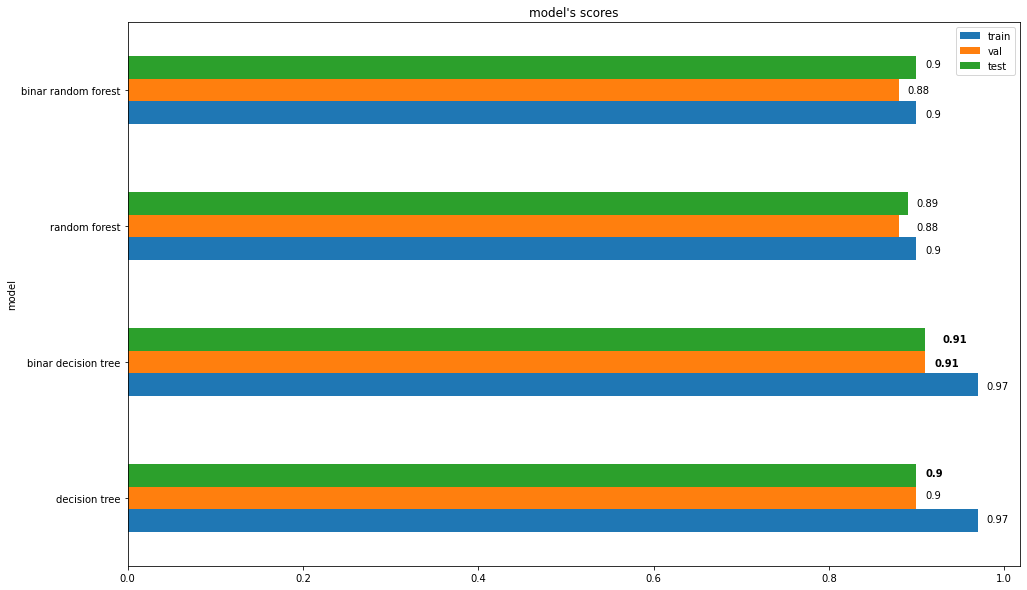

In [48]:
tr = list(rounded_data_res[rounded_data_res['dataset type']=='train']['accuracy'])
v = list(rounded_data_res[rounded_data_res['dataset type']=='val']['accuracy'])
t = list(rounded_data_res[rounded_data_res['dataset type']=='test']['accuracy'])
index = ['decision tree', 'binar decision tree', 'random forest', 'binar random forest']




df_fig = pd.DataFrame({'train': tr, 'val': v, 'test':t}, index=index)

ax = df_fig.plot.barh(figsize = (16, 10), xlabel='model', ylabel= 'accuracy score', title = "model's scores" )

plt.text(0.91,3.17,df_fig['test'][3])
plt.text(0.89,2.98,df_fig['val'][3])
plt.text(0.91,2.8,df_fig['train'][3])

plt.text(0.9,2.15,df_fig['test'][2])
plt.text(0.9,1.97,df_fig['val'][2])
plt.text(0.91,1.8,df_fig['train'][2])

plt.text(0.93,1.15,df_fig['test'][1],fontweight="bold")
plt.text(0.92,0.97,df_fig['val'][1], fontweight="bold")
plt.text(0.98,0.8,df_fig['train'][1])

plt.text(0.91,0.16,df_fig['test'][0], fontweight="bold")
plt.text(0.91,0,df_fig['val'][0])
plt.text(0.98,-0.18,df_fig['train'][0] )

plt.savefig('results.png')

In [46]:
df_fig

,train,val,test
decision tree,0.97,0.90,0.90
binar decision tree,0.97,0.91,0.91
random forest,0.90,0.88,0.89
binar random forest,0.90,0.88,0.90


# conclusion
#
The binary decision tree model seems to be the most successful and has the most accurate predictive power. Random Forest models present more "cautious" predictions - most predictions for winning a medal will be correct, but the certainty of classifying an observation as a medal winner will very rarely be made.